# TAREA - Integración montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [4]:
def f1(x):
    return np.exp(x)*np.log10(x)

In [5]:
def f2(x):
    return np.sin(x)*np.log(x)

In [8]:
# Definimos el primer método de integración Montecarlo
def Montecarlo1(f,a,b,N):
    u = np.random.uniform(a,b,N) # 'N' Números aleatrorios uniformemente distribuidos entre 0 y 1
    y = f(u) #Evaluar los puntos 'u' en la función a integrar 
    return np.mean(y)*(b-a) #Aproximación de la integral

In [11]:
N = np.logspace(1,5,5).astype('int') #[10**1, 10**2, ..., 10**5]
N

array([    10,    100,   1000,  10000, 100000])

In [13]:
tabla = pd.DataFrame(index = N, columns = ['funcion 1', 'funcion 2'])
for n in N:
    tabla.loc[n, 'funcion 1'] = Montecarlo1(f1,1,3,n)
    tabla.loc[n, 'funcion 2'] = Montecarlo1(f2,1,3,n)
tabla

,funcion 1,funcion 2
10,7.569189,0.822546
100,7.576366,0.800195
1000,6.110078,0.855056
10000,6.146298,0.875044
100000,6.109778,0.869583


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [14]:
def region (x,y):
    return (x**2) + 2*(y**2) <= (-2*x) + (8*y) - 7

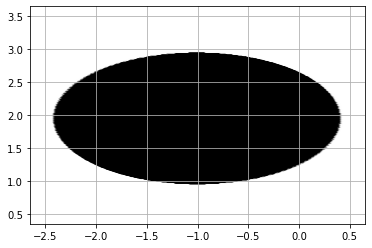

In [20]:
minx, maxx = -2.5,0.5
miny, maxy = 0.5,3.5#-0.5,1
x = np.linspace(minx,maxx,300)
y = np.linspace(miny,maxy,300)
X, Y = np.meshgrid(x,y)
plt.scatter(X,Y,c =~ region(X,Y), cmap = 'gray') # ~ es negación booleana
plt.grid()

In [22]:
N = np.logspace(1,5,5).astype('int')
N

array([    10,    100,   1000,  10000, 100000])

In [23]:
def montecarlo2(bernoulli,minx,maxx,miny,maxy,N):
    ux = np.random.uniform(minx,maxx,N)
    uy = np.random.uniform(miny,maxy,N)
    B = bernoulli(ux,uy)
    AR = (maxx-minx)*(maxy-miny)
    return AR*np.mean(B)

In [28]:
tabla = pd.DataFrame(index = N, columns = ['Aprox', 'E rel'])
for n in N:
    tabla.loc[n, 'Aprox'] = montecarlo2(region,minx,maxx,miny,maxy,n)
AR = (maxx-minx)*(maxy-miny)
th = tabla['Aprox']/AR
tabla['E rel'] = (1/np.sqrt(N))*(((1-th)/th)**0.5)
tabla

,Aprox,E rel
10,2.7,0.483046
100,4.68,0.096077
1000,4.41,0.032262
10000,4.4703,0.010066
100000,4.40163,0.003232
